## Apriori Algorithm

#### What is it?
- An algorithm for finding frequent itemsets in transaction databases
- Used in market basket analysis and recommendation systems
- Based on the principle: "All subsets of a frequent itemset must be frequent"

#### Key Terms
- **Support**: How often items appear together in the database
- **Confidence**: How likely item Y appears when X is present
- **Minimum Support**: Threshold to determine frequent itemsets
- **Minimum Confidence**: Threshold to determine strong rules

#### How it Works
1. Find all frequent individual items
2. Combine items to find frequent pairs
3. Combine pairs to find frequent triplets
4. Continue until no more frequent combinations found

#### Example Use Case
Finding products often bought together:
- If {bread, butter} appears frequently
- And confidence({bread} → {butter}) is high
- Then placing butter near bread might increase sales

#### Advantages
- Simple to understand and implement
- Reduces search space effectively
- Works well with sparse datasets

#### Limitations
- Can be slow with large datasets
- Requires multiple database scans
- Memory intensive for low support values

#### Representation

<span style="color:pink">if</span> Antecedent(T,S) <span style="color:pink">then</span> Consequent(Y)

<span style="color:pink">support</span> n{T,S,Y} 

---


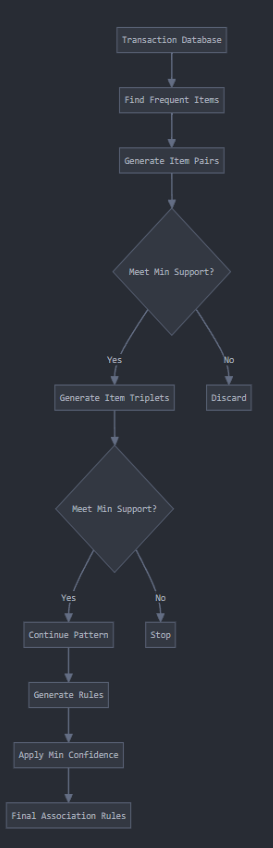


#### Confidence
- Representation

$$
\text{Confidence} = \frac{\text{Support(if-part and then-part)}}{\text{Support(if-part)}}
$$


- Confidence with conditional probability

$$
\text{Confidence} = \text{P(then-part | if-part)} = \frac{\text{P(if-part and then-part)}}{\text{P(if-part)}}
$$

Where P -> Probability


- If if-part and then-part are independent
$$
{\text{P(if-part and then-part)}} = \text{P(if-part)* P(then-part)}
$$
$$
\text{Confidence} = \text{P(then-part | if-part)} =  \frac{\text{P(if-part)* P(then-part)}}{\text{P(if-part)}} 
$$ 

- Benchmark Confidence
$$
{\text{Benchmark Confidence}} = \frac{\text{Number of Transactions with if-part and then-part}}{\text{Number of Transactions in The Database}}
$$

- Lift Ratio
$$
Lift Ratio = \frac{\text{Confidence}}{\text{Benchmark Confidence}}
$$

&nbsp;&nbsp;&nbsp;&nbsp; For better model Lift ratio should be higher than 1

---

$$
  Code
$$

In [119]:
import numpy as np
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder


In [120]:
faceplate_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\Faceplate.csv', index_col=0)
faceplate_df = faceplate_df.astype(bool)
faceplate_df

,Red,White,Blue,Orange,Green,Yellow
Transaction,,,,,,
1,True,True,False,False,True,False
2,False,True,False,True,False,False
3,False,True,True,False,False,False
4,True,True,False,True,False,False
5,True,False,True,False,False,False
6,False,True,True,False,False,False
7,True,False,True,False,False,False
8,True,True,True,False,True,False
9,True,True,True,False,False,False


In [121]:
frequent_itemsets = apriori(faceplate_df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.6,(Red),1
1,0.7,(White),1
2,0.6,(Blue),1
3,0.4,"(White, Red)",2
4,0.4,"(Blue, Red)",2
5,0.4,"(Blue, White)",2


In [122]:
rules = association_rules(
    df=frequent_itemsets, 
    metric="confidence", 
    min_threshold=0.2, 
    num_itemsets=len(faceplate_df)
)

rules.sort_values(by="confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(Red),(White),0.6,0.7,0.4,0.666667,0.952381,1.0,-0.02,0.900000,-0.111111,0.444444,-0.111111,0.619048
2,(Blue),(Red),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.200000,0.250000,0.500000,0.166667,0.666667
3,(Red),(Blue),0.6,0.6,0.4,0.666667,1.111111,1.0,0.04,1.200000,0.250000,0.500000,0.166667,0.666667
4,(Blue),(White),0.6,0.7,0.4,0.666667,0.952381,1.0,-0.02,0.900000,-0.111111,0.444444,-0.111111,0.619048
0,(White),(Red),0.7,0.6,0.4,0.571429,0.952381,1.0,-0.02,0.933333,-0.142857,0.444444,-0.071429,0.619048
5,(White),(Blue),0.7,0.6,0.4,0.571429,0.952381,1.0,-0.02,0.933333,-0.142857,0.444444,-0.071429,0.619048


---

Using Gradio

In [123]:
import gradio as gr 

fp_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\Cosmetics.csv',index_col=0)
fp_df = fp_df.astype(bool)

def gen_rules(min_sup, min_conf):
    itemsets = apriori(
        df=fp_df, 
        min_support=min_sup, 
        use_colnames=True
    )
    
    rules = association_rules(
        df=itemsets, 
        metric='confidence', 
        min_threshold=min_conf,
        num_itemsets=len(fp_df),
        return_metrics=[ 'support', 'confidence', 'lift']
    )
    
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    rules = rules[rules['lift']>1]
    rules['antecedents'] = [list(x) for x in rules['antecedents'].values]
    rules['consequents'] = [list(x) for x in rules['consequents'].values]
    
    return rules.sort_values(by='lift', ascending=False)

demo = gr.Interface(
    gen_rules, 
    inputs=[
        gr.Slider(
            value=0.01, 
            step=0.01,
            label="Minimum Support",
            minimum=0.0001, 
            maximum=1
        ),
        gr.Slider(
            value=0.01, step=0.01,
            label="Minimum Confidence",    
            minimum=0.0001, 
            maximum=1
        )
    ], 
    outputs='dataframe',
    title="Apriori Algorithm",
)

if __name__ == "__main__":
    demo.launch()
    
    
    

* Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


---

In [132]:
def get_ui(fp_df):
    fp_df = fp_df.astype(bool)
    
    with gr.Blocks() as demo:
        gr.Markdown("# Apriori Algorithm")
        
        with gr.Column():
            min_sup = gr.Slider(
                value=0.01, 
                step=0.01,
                label="Minimum Support",
                minimum=0.0001, 
                maximum=1
            )
            min_conf = gr.Slider(
                value=0.01, 
                step=0.01,
                label="Minimum Confidence",    
                minimum=0.0001, 
                maximum=1
            )
            output = gr.Dataframe()
            
            submit_btn = gr.Button("Generate Rules")
            submit_btn.click(
                fn=lambda s, c: gen_rules(fp_df, s, c),
                inputs=[min_sup, min_conf],
                outputs=output
            )
    
    demo.launch()


In [129]:
def gen_rules(fp_df, min_sup, min_conf):
    itemsets = apriori(
        df=fp_df, 
        min_support=min_sup, 
        use_colnames=True
    )
    
    rules = association_rules(
        df=itemsets, 
        metric='confidence', 
        min_threshold=min_conf,
        num_itemsets=len(fp_df)
    )
    
    rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    rules = rules[rules['lift'] > 1]
    rules['antecedents'] = [list(x) for x in rules['antecedents'].values]
    rules['consequents'] = [list(x) for x in rules['consequents'].values]
    
    return rules.sort_values(by='lift', ascending=False)



In [130]:
path = r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\Groceries.csv'
groceries = []
with open(path) as f:
    groceries = f.read()

groceries = groceries.split('\n')


groceries_list = []
for i in groceries:
    groceries_list.append(i.split(','))

te = TransactionEncoder().set_output(transform='pandas')
te_ary = te.fit(groceries_list).transform(groceries_list)
te_ary

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [133]:
get_ui(te_ary)

* Running on local URL:  http://127.0.0.1:7874

To create a public link, set `share=True` in `launch()`.
